In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lexicon EDA

In [2]:
def load_lexicon(file_path):
    vad_dict = {}
    """VAD Lexicon 파일을 읽어 딕셔너리로 저장"""
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 4:  # 단어와 3개의 점수가 있는지 확인
                word = parts[0]
                scores = [float(score) for score in parts[1:]]
                vad_dict[word] = {
                    'valence': scores[0],
                    'arousal': scores[1],
                    'dominance': scores[2]
                }
    return vad_dict

In [3]:
vad_dict = load_lexicon("Lexicon.txt")

In [4]:
# vad_dict에서 valence와 arousal 값을 추출하여 DataFrame 생성
data = {
    'valence': [entry['valence'] for entry in vad_dict.values()],
    'arousal': [entry['arousal'] for entry in vad_dict.values()]
}

In [5]:
df = pd.DataFrame(data)

In [6]:
# 기술 통계량 계산 (평균, 분산, 표준편차 등)
stats = df.describe()
# 결과 출력
print(stats)

            valence       arousal
count  19839.000000  19839.000000
mean      -0.000508     -0.000162
std        0.430949      0.341888
min       -1.000000     -0.908000
25%       -0.306000     -0.250000
50%        0.020000     -0.040000
75%        0.306000      0.224000
max        1.000000      0.980000


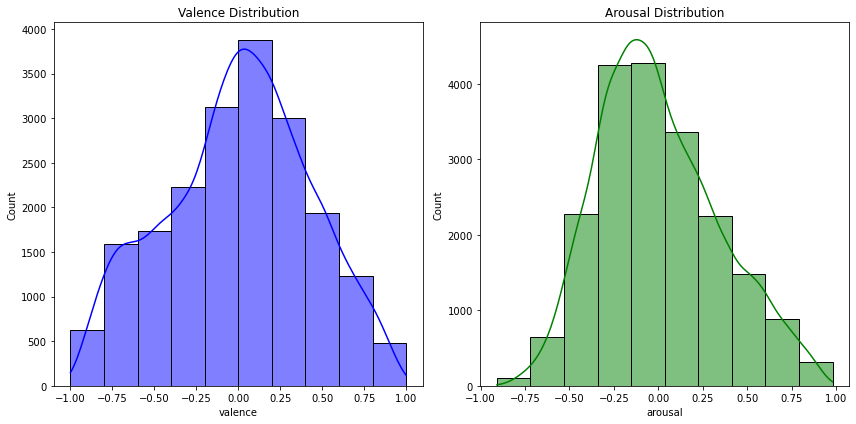

In [7]:
# 분포 시각화 (히스토그램)
plt.figure(figsize=(12, 6))

# valence 분포
plt.subplot(1, 2, 1)
sns.histplot(df['valence'], kde=True, color='blue', bins=10)
plt.title('Valence Distribution')

# arousal 분포
plt.subplot(1, 2, 2)
sns.histplot(df['arousal'], kde=True, color='green', bins=10)
plt.title('Arousal Distribution')

plt.tight_layout()
plt.show()